In [1]:
import numpy as np
import scipy as sp
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import glob

import ssa_calc

from astropy.time import Time

In [2]:
# Path to processed telemetry files:
BASE_PATH = r"../telemetry-files/delfi-c3/processed-2008-2022/"

# List of all files in the BASE_PATH directory:
hdf_files = glob.glob(BASE_PATH + "*.hdf")

df_dict = {}

for hdf_file in hdf_files:
    year = int(hdf_file.split("-")[-1][:-4])
    frames_df = pd.read_hdf(hdf_file, key="frames")
    housekeeping_df = pd.read_hdf(hdf_file, key="housekeeping")
    payload_df = pd.read_hdf(hdf_file, key="payload")
    
    frames_raw_df = pd.read_hdf(hdf_file, key="frames_raw")
    housekeeping_raw_df = pd.read_hdf(hdf_file, key="housekeeping_raw")
    payload_raw_df = pd.read_hdf(hdf_file, key="payload_raw")
    
    df_dict[f"{year}_frames"] = frames_df
    df_dict[f"{year}_housekeeping"] = housekeeping_df
    df_dict[f"{year}_payload"] = payload_df
    df_dict[f"{year}_frames_raw"] = frames_raw_df
    df_dict[f"{year}_housekeeping_raw"] = housekeeping_raw_df
    df_dict[f"{year}_payload_raw"] = payload_raw_df

In [26]:
df_dict["2008_frames"].head()

,FrameID,Corrected Reception Time,UserID,CheckSum,Time (utc),Time (jd),beta (deg),fe,theta (deg),theta_T (deg),Sat lat (deg),Sat lon (deg),Valid
0,329730,2008-06-30 01:28:10,203,1,2008-06-29 23:28:10.000,2.454647e+06,29.933926,0.343356,351.257535,109.453417,40.882876,158.393045,1.0
1,329731,2008-06-30 01:28:16,203,1,2008-06-29 23:28:16.000,2.454647e+06,29.933975,0.343343,351.629078,109.827370,40.517610,158.278107,1.0
2,329732,2008-06-30 01:28:16,203,1,2008-06-29 23:28:16.000,2.454647e+06,29.933975,0.343343,351.629078,109.827370,40.517610,158.278107,1.0
3,329733,2008-06-30 01:28:17,203,1,2008-06-29 23:28:17.000,2.454647e+06,29.933983,0.343341,351.691001,109.889695,40.456726,158.259046,1.0
4,329734,2008-06-30 01:28:21,203,1,2008-06-29 23:28:21.000,2.454647e+06,29.934016,0.343332,351.938692,110.139001,40.213173,158.183072,1.0


In [32]:
delfi_c3 = ssa_calc.Satellite(
    r"../orbit-propagation/interpolators/delfi-c3-pos-interpolator-2008-04-28-to-2022-10-23.pkl",
    r"../orbit-propagation/interpolators/delfi-c3-vel-interpolator-2008-04-28-to-2022-10-23.pkl",
)

Loading interpolators from pickle files...
Interpolators loaded.


In [54]:
payload_df = df_dict["2008_payload"]


In [ ]:
frames_df = df_dict["2008_frames"]

for i, row in payload_df.iterrows():
# Corresponding index in frames_df:
    idx = frames_df[frames_df["FrameID"] == row["FrameID"]].index[0]
    payload_df.loc[i, "raw_time"] = frames_df.loc[idx, "Corrected Reception Time"]
    angles_raw = delfi_c3.calc_beta_fe_theta(Time(payload_df.loc[i, "raw_time"]))
    theta_T_raw = angles_raw[-1].to("deg").value
    payload_df.loc[i, "theta_T_raw"] = theta_T_raw

In [46]:
payload_df.head()

,FrameID,TFSC Z+X+ Temperature [°C],TFSC Z+X- Temperature [°C],TFSC Z-Y+ Temperature [°C],TFSC Z-Y- Temperature [°C],UserID,Time (utc),Time (jd),beta (deg),fe,theta (deg),theta_T (deg),TFSC Z+X+ Temperature (K),TFSC Z+X- Temperature (K),TFSC Z-Y+ Temperature (K),TFSC Z-Y- Temperature (K),Total Temperature (K),raw_time,theta_T_raw
0,330056.0,-78.043,14.164,-58.710,-8.135,203.0,2008-06-30 10:20:12.000,2.454648e+06,29.969606,0.342737,244.115432,2.422817,195.107,287.314,214.440,265.015,961.876,2008-06-30 12:20:12,86.751337
1,330058.0,-78.043,15.656,-58.710,-8.135,203.0,2008-06-30 10:20:16.000,2.454648e+06,29.969604,0.342747,244.362905,2.668451,195.107,288.806,214.440,265.015,963.368,2008-06-30 12:20:16,87.000261
2,330059.0,-78.043,17.148,-57.265,-6.690,203.0,2008-06-30 10:20:17.000,2.454648e+06,29.969603,0.342750,244.424774,2.729860,195.107,290.298,215.885,266.460,967.750,2008-06-30 12:20:17,87.062491
3,330060.0,-78.043,14.164,-57.265,-5.245,203.0,2008-06-30 10:20:18.000,2.454648e+06,29.969603,0.342752,244.486646,2.791272,195.107,287.314,215.885,267.905,966.211,2008-06-30 12:20:18,87.124723
4,330062.0,-78.043,17.148,-57.265,-5.245,203.0,2008-06-30 10:20:21.000,2.454648e+06,29.969601,0.342760,244.672255,2.975502,195.107,290.298,215.885,267.905,969.195,2008-06-30 12:20:21,87.311420


In [42]:
angles_raw = delfi_c3.calc_beta_fe_theta(Time(payload_df.loc[0, "Time (utc)"]))
print(angles_raw[-1].to("deg").value)

2.422817476495762


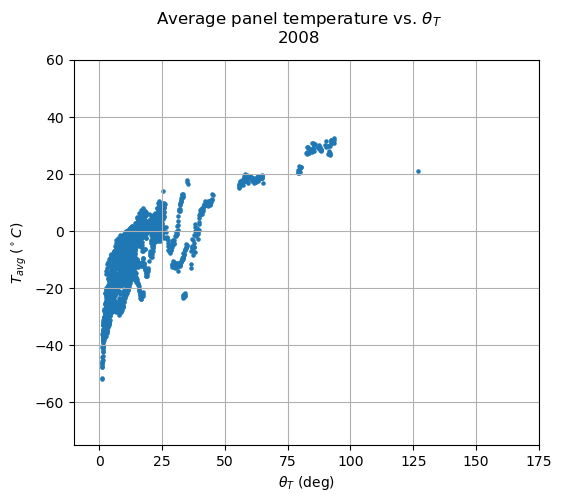

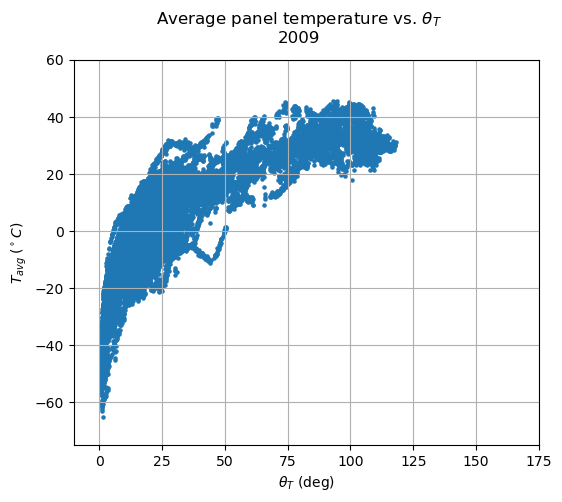

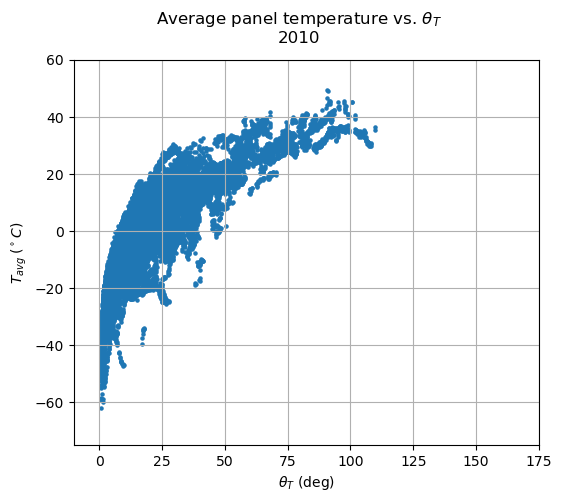

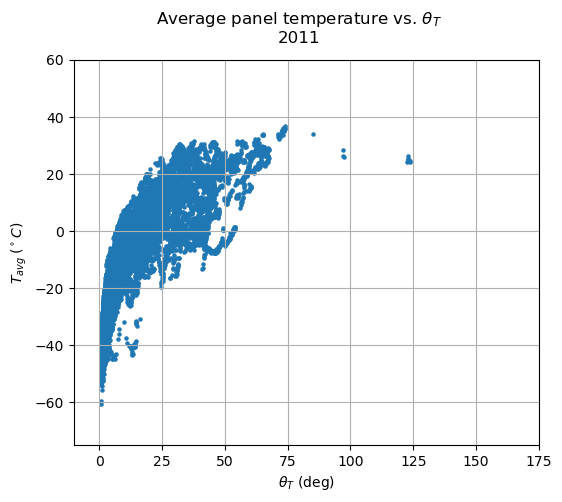

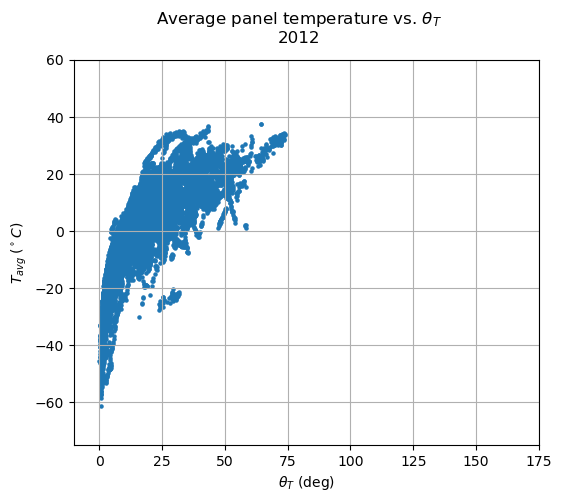

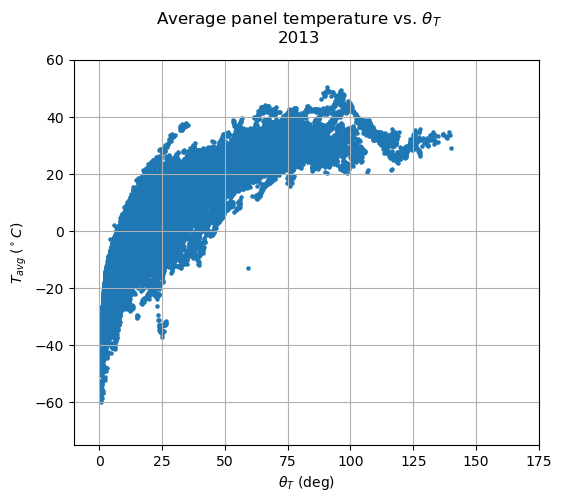

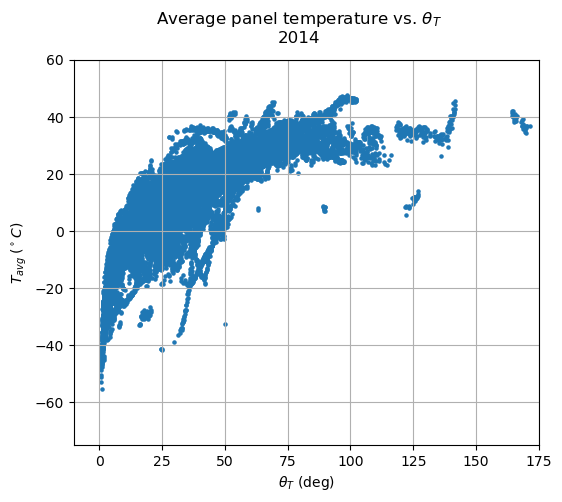

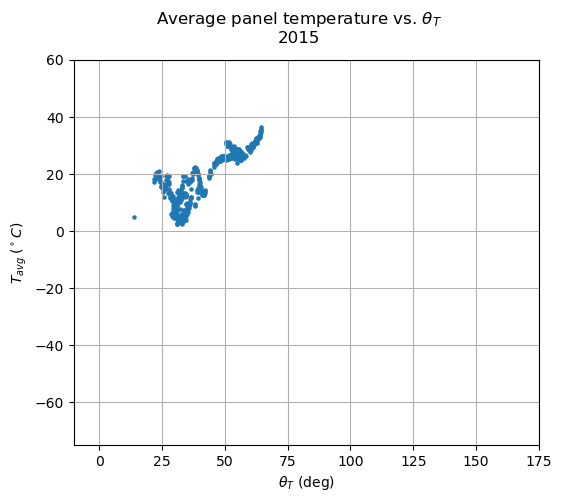

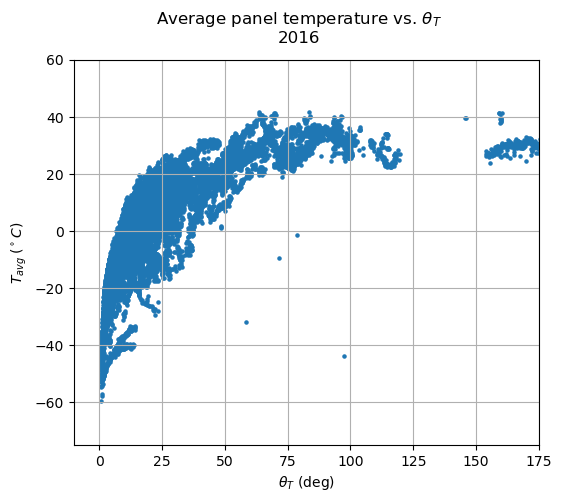

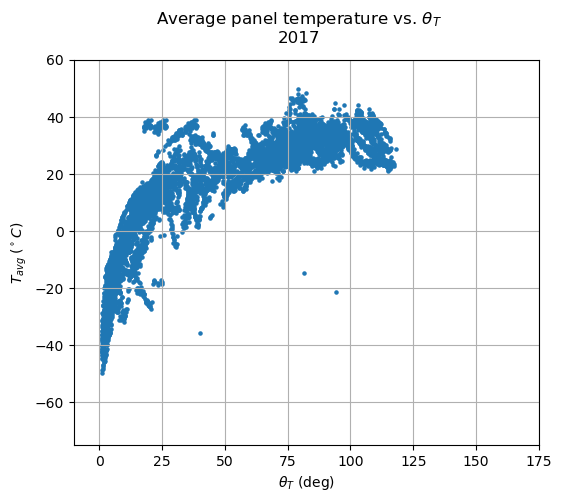

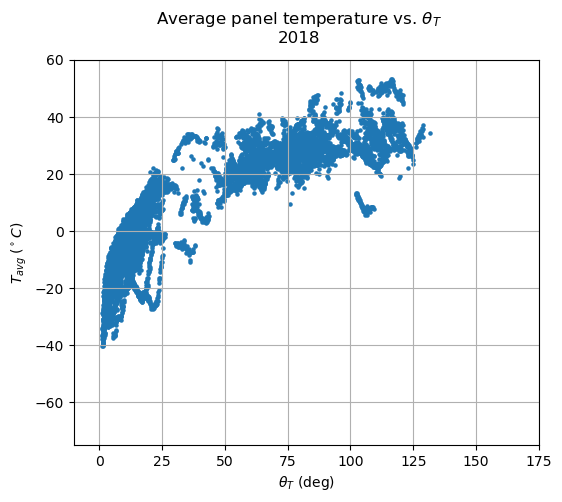

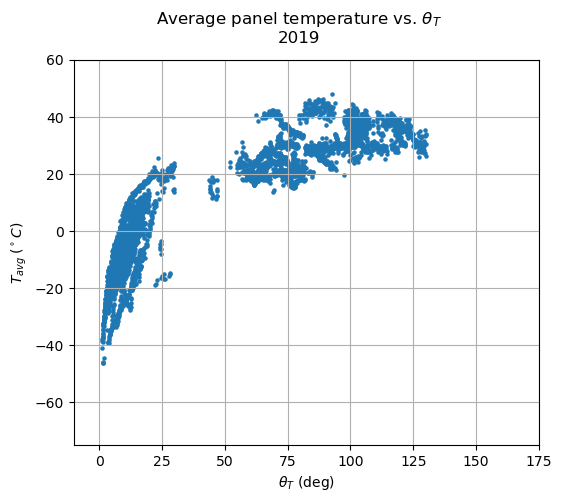

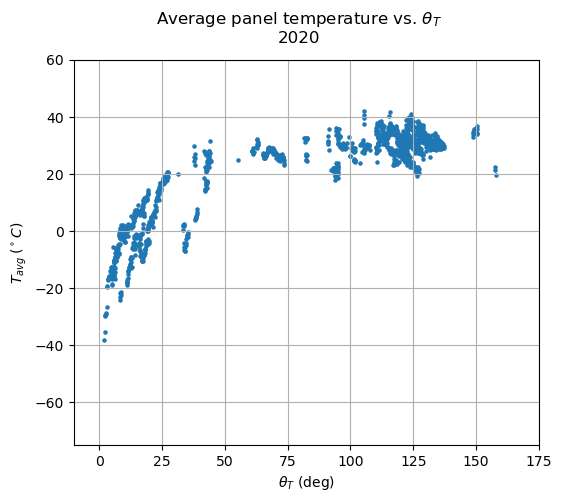

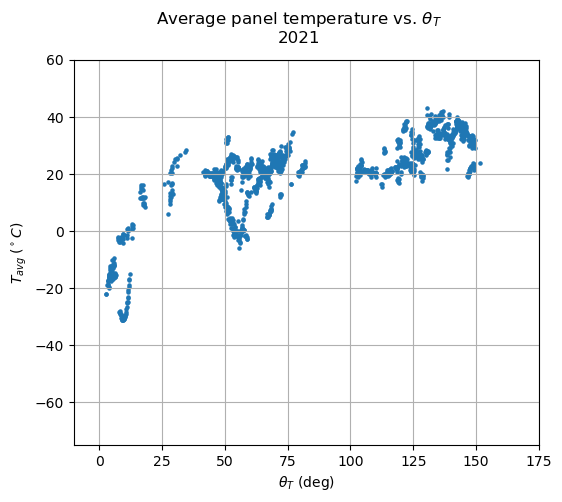

In [4]:
df_concat = pd.DataFrame()
for year in range(2008, 2022):
    payload_df = df_dict[f"{year}_payload"]
    df_concat = pd.concat([df_concat, payload_df])
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.scatter(
        payload_df["theta_T (deg)"],
        payload_df["Total Temperature (K)"] / 4 - 273.15,
        s=5
    )
    ax.set_xlabel(r"$\theta_T$ (deg)")
    ax.set_ylabel(r"$T_{avg}\;(^\circ C)$")
    ax.set_ylim(-75, 60)
    ax.set_xlim(-10, 175)
    ax.grid()
    
    fig.suptitle(f"Average panel temperature vs. $\\theta_T$\n{year}")
    
    fig.savefig(r"./plots/processed-temperatures/{}".format(year))
    


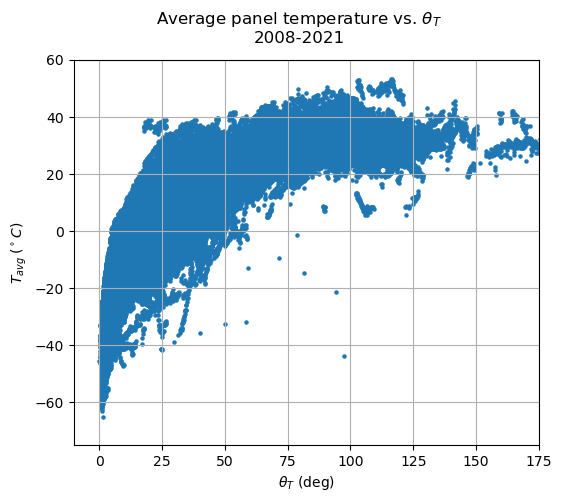

In [5]:
fig, ax = plt.subplots(figsize=(6, 5))
ax.scatter(
    df_concat["theta_T (deg)"],
    df_concat["Total Temperature (K)"] / 4 - 273.15,
    s=5
)

ax.set_xlabel(r"$\theta_T$ (deg)")
ax.set_ylabel(r"$T_{avg}\;(^\circ C)$")
ax.set_ylim(-75, 60)
ax.set_xlim(-10, 175)
ax.grid()

fig.suptitle(f"Average panel temperature vs. $\\theta_T$\n2008-2021")

fig.savefig(r"./plots/processed-temperatures/2008-2021")

In [63]:
def curve_fit_model(x, a, b, c):
    return a * (1 - np.exp(-b * x)) + c


x_data = payload_df[~np.isnan(payload_df["Total Temperature (K)"]) & (payload_df["theta_T (deg)"] < 150)]["theta_T (deg)"].to_numpy()
y_data = payload_df[~np.isnan(payload_df["Total Temperature (K)"]) & (payload_df["theta_T (deg)"] < 150)]["Total Temperature (K)"].to_numpy() / 4 - 273.15

popt, pcov = sp.optimize.curve_fit(curve_fit_model, x_data, y_data)

x_fit = np.linspace(0, 180, 1000)
y_fit = curve_fit_model(x_fit, *popt)

/tmp/ipykernel_7497/4106446644.py:2: RuntimeWarning: overflow encountered in exp
  return a * (1 - np.exp(-b * x)) + c
/tmp/ipykernel_7497/4106446644.py:2: RuntimeWarning: overflow encountered in multiply
  return a * (1 - np.exp(-b * x)) + c


/tmp/ipykernel_7497/4106446644.py:2: RuntimeWarning: overflow encountered in exp
  return a * (1 - np.exp(-b * x)) + c
/tmp/ipykernel_7497/4106446644.py:2: RuntimeWarning: overflow encountered in multiply
  return a * (1 - np.exp(-b * x)) + c
/miniconda3/envs/thesis-env/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


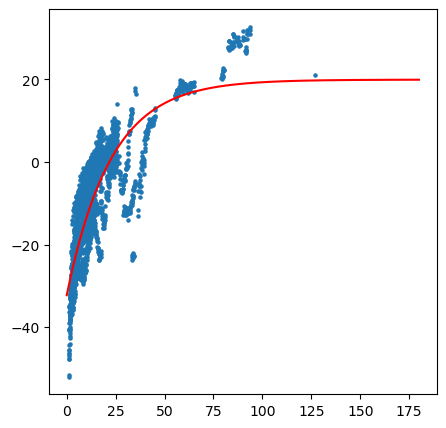

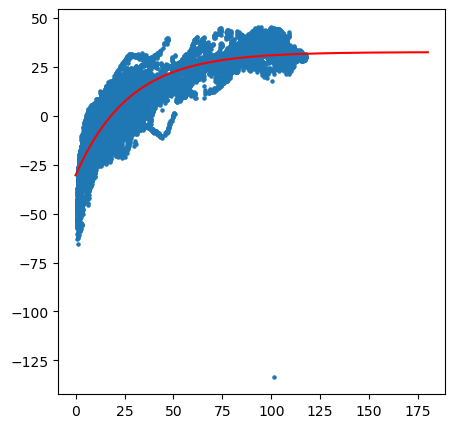

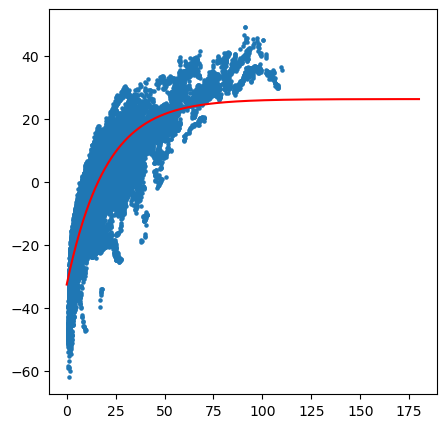

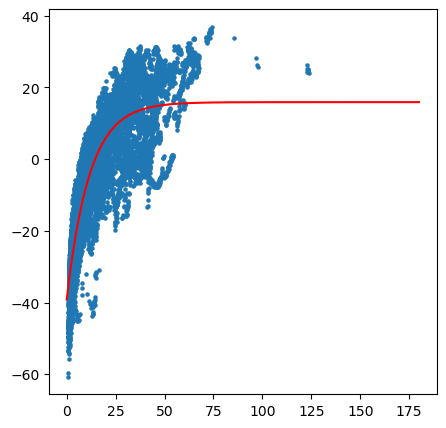

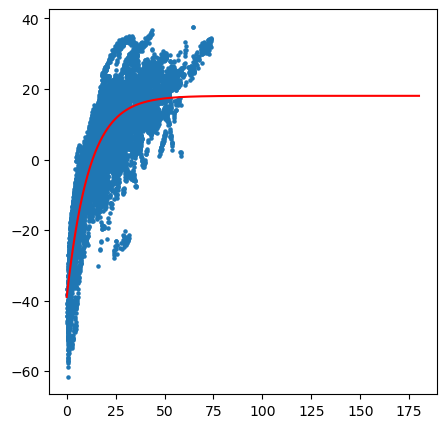

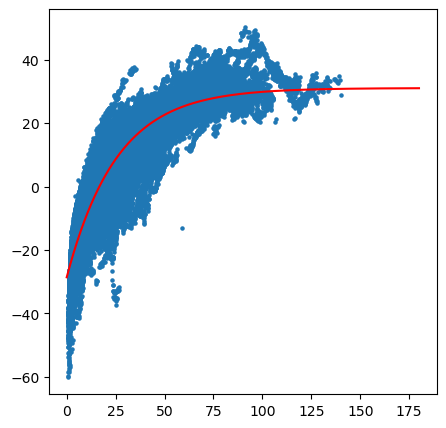

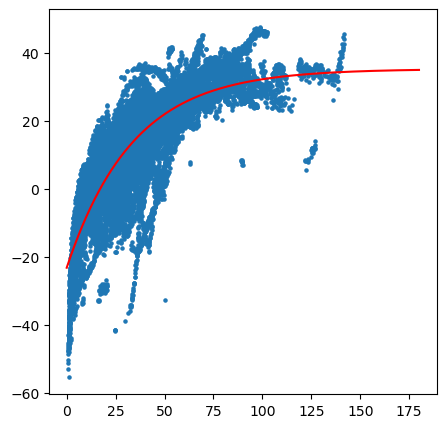

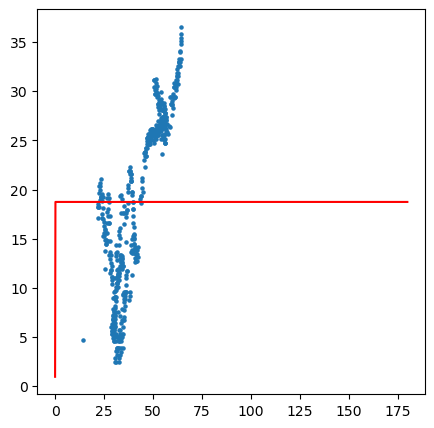

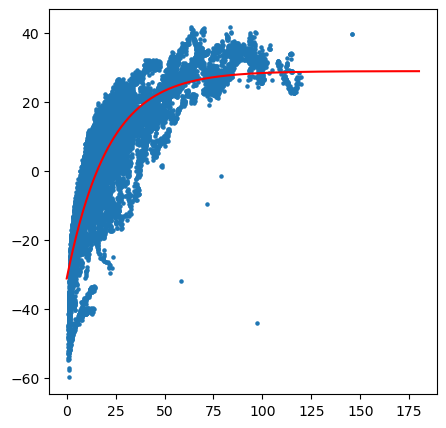

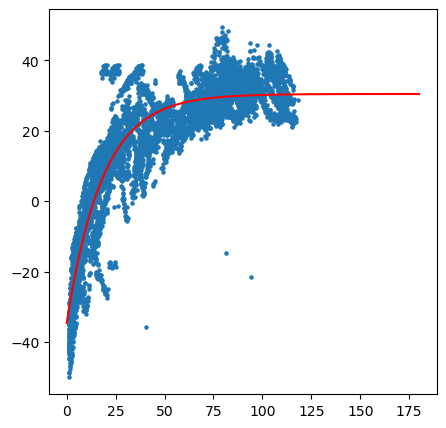

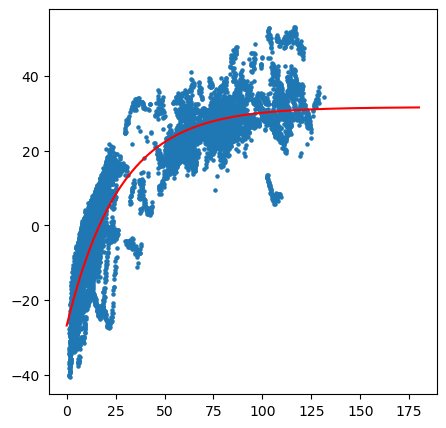

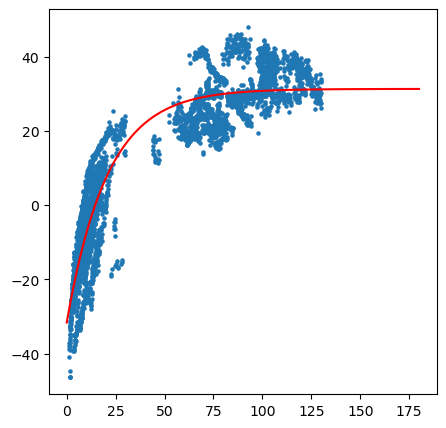

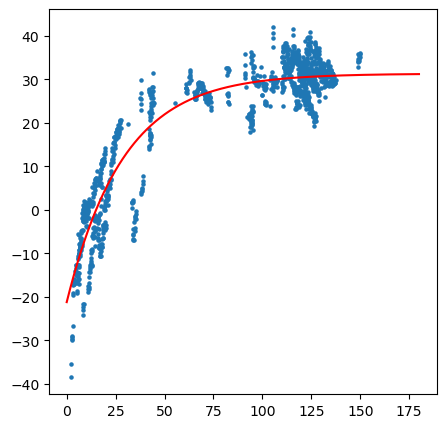

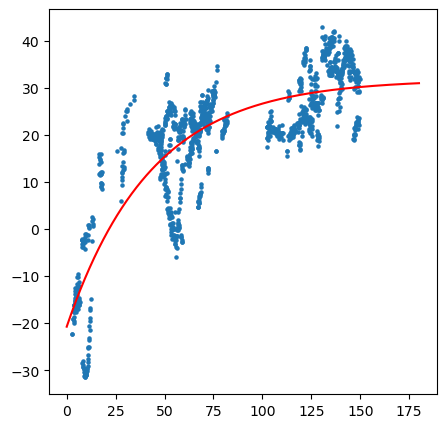

In [99]:
opt_list = []
avg_start = np
for year in range(2008, 2022):
    payload_df = df_dict[f"{year}_payload"]
    
    x_data = payload_df[~np.isnan(payload_df["Total Temperature (K)"]) & (payload_df["theta_T (deg)"] < 150)]["theta_T (deg)"].to_numpy()
    y_data = payload_df[~np.isnan(payload_df["Total Temperature (K)"]) & (payload_df["theta_T (deg)"] < 150)]["Total Temperature (K)"].to_numpy() / 4 - 273.15

    popt, pcov = sp.optimize.curve_fit(curve_fit_model, x_data, y_data)
    opt_list.append(popt)

    x_fit = np.linspace(0, 180, 1000)
    y_fit = curve_fit_model(x_fit, *popt)
    
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.scatter(x_data, y_data, s=5)
    plt.plot(x_fit, y_fit, color="red")
    
opt_list = np.array(opt_list)
opt_list[7, :] = np.nan

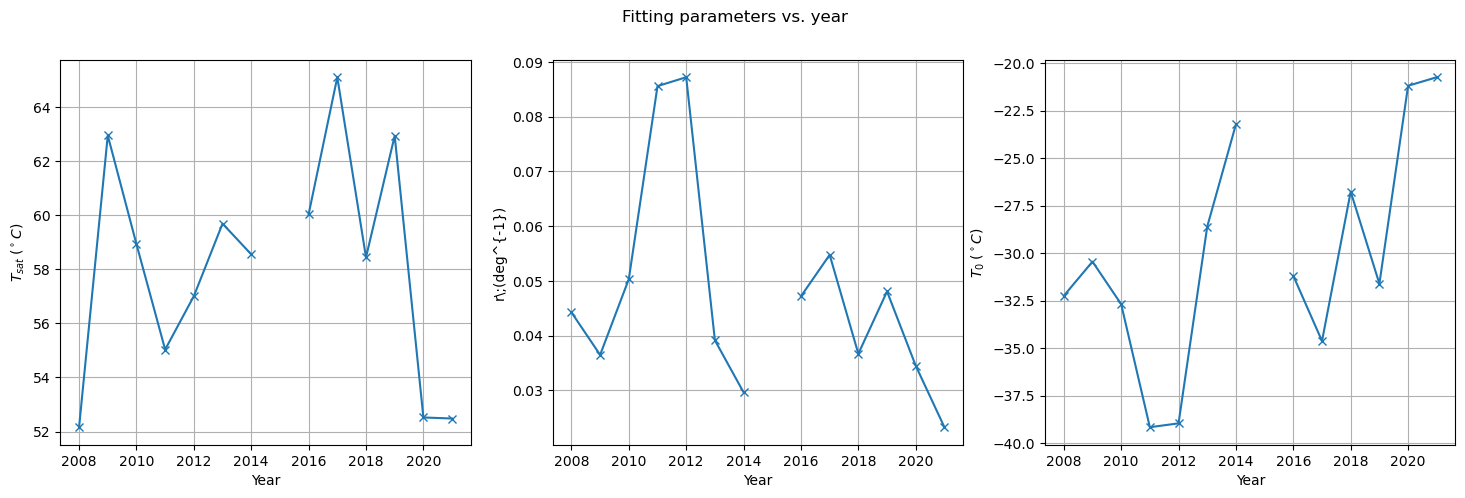

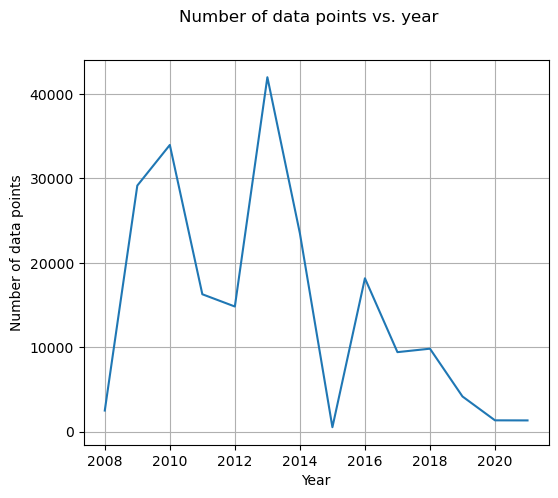

In [109]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
years = np.arange(2008, 2022)
for i in range(3):
    ax[i].plot(years, opt_list[:, i], marker="x")
    ax[i].grid()
    ax[i].set_xlabel("Year")
    
ax[0].set_ylabel(r"$T_{sat}\;(^\circ C)$")
ax[1].set_ylabel(r"r\;(deg^{-1})")
ax[2].set_ylabel(r"$T_{0}\;(^\circ C)$")

fig.suptitle("Fitting parameters vs. year")


lens = []
for i in range(2008, 2022):
    df = df_dict[f"{i}_payload"]
    lens.append(df[~np.isnan(df["Total Temperature (K)"]) & (df["theta_T (deg)"] < 150)].shape[0])

fig, ax = plt.subplots(figsize=(6, 5))
ax.plot(years, lens)
ax.set_xlabel("Year")
ax.set_ylabel("Number of data points")
ax.grid()
fig.suptitle("Number of data points vs. year")
plt.show()

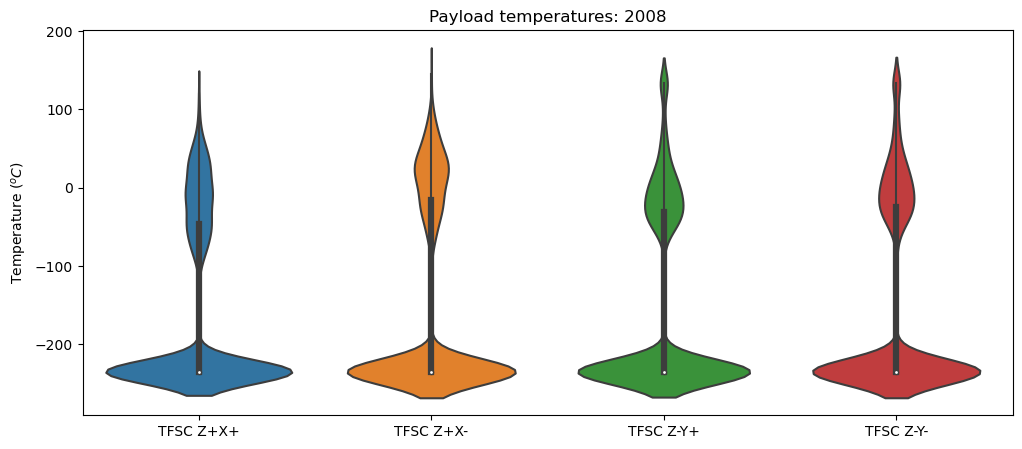

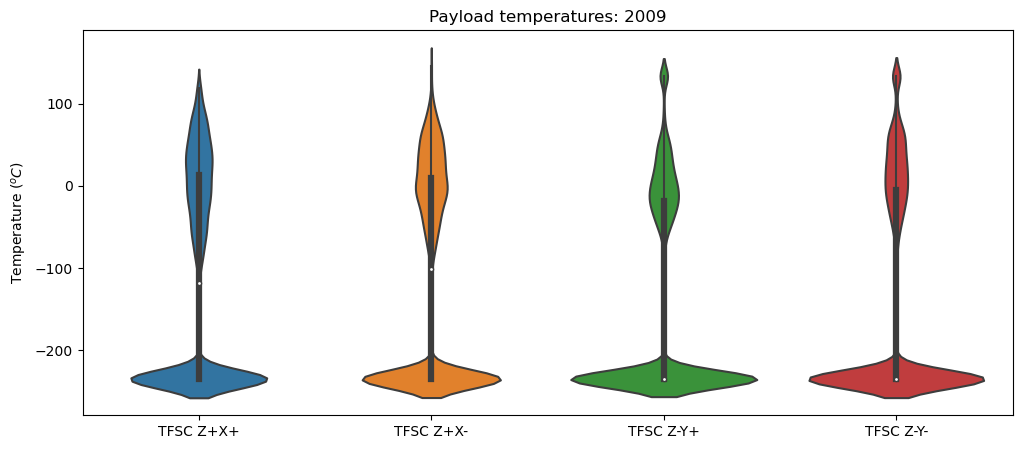

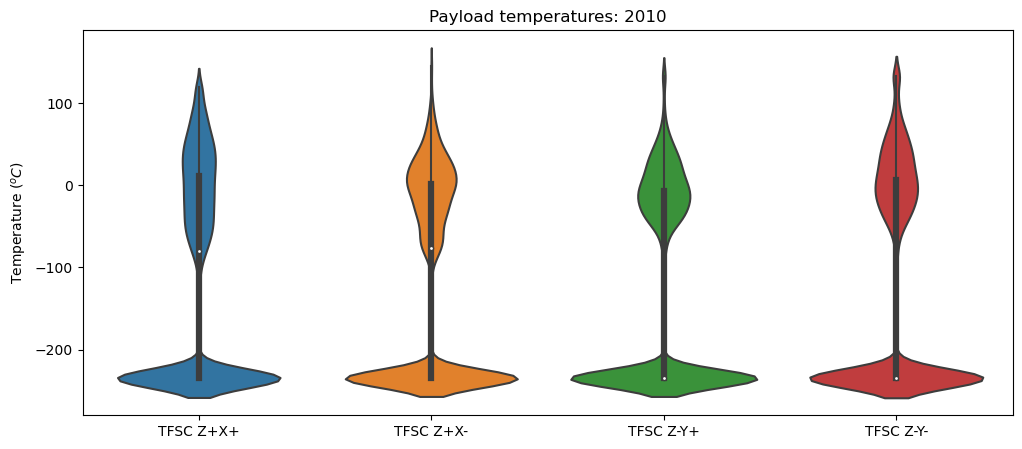

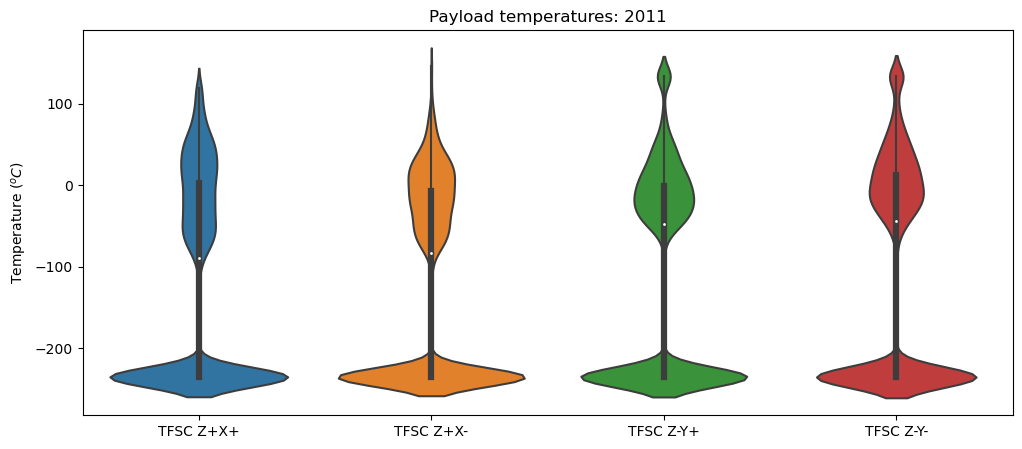

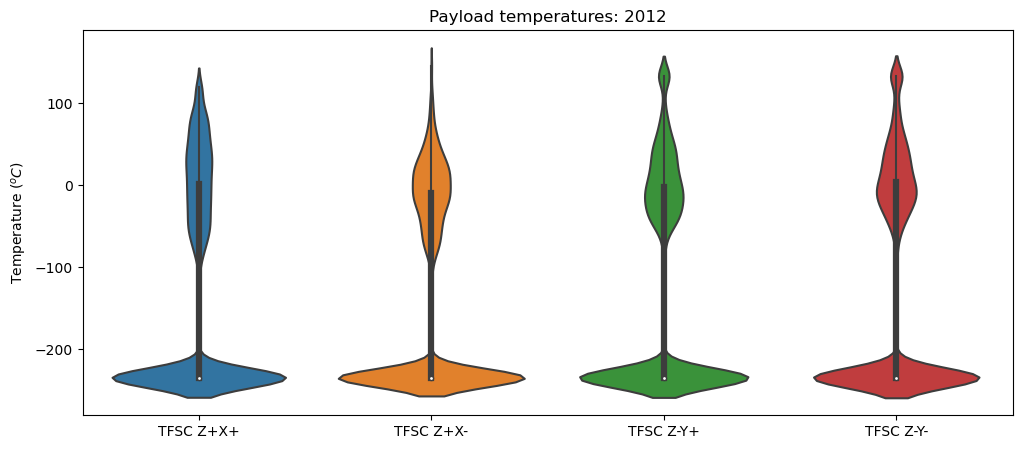

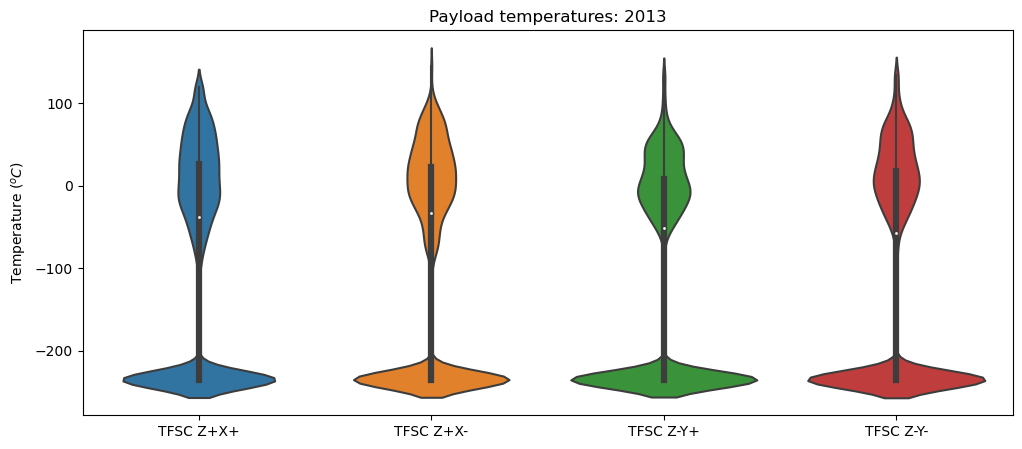

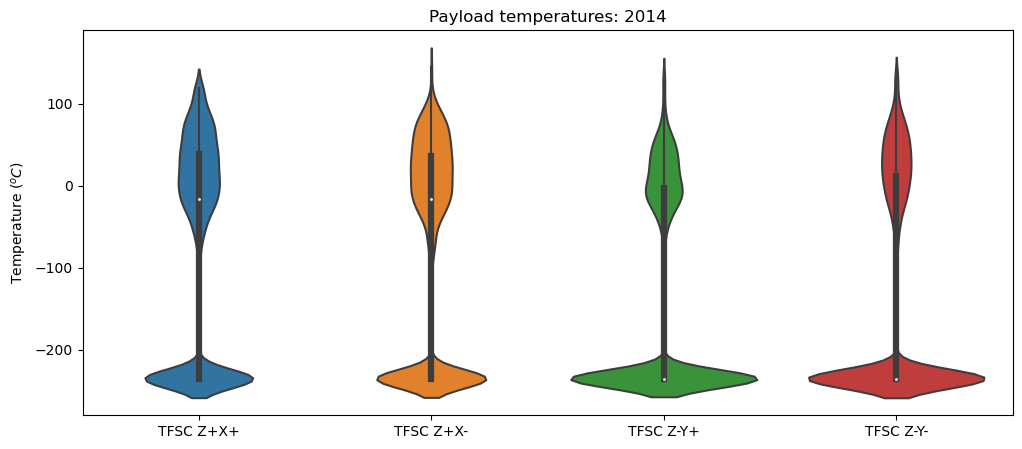

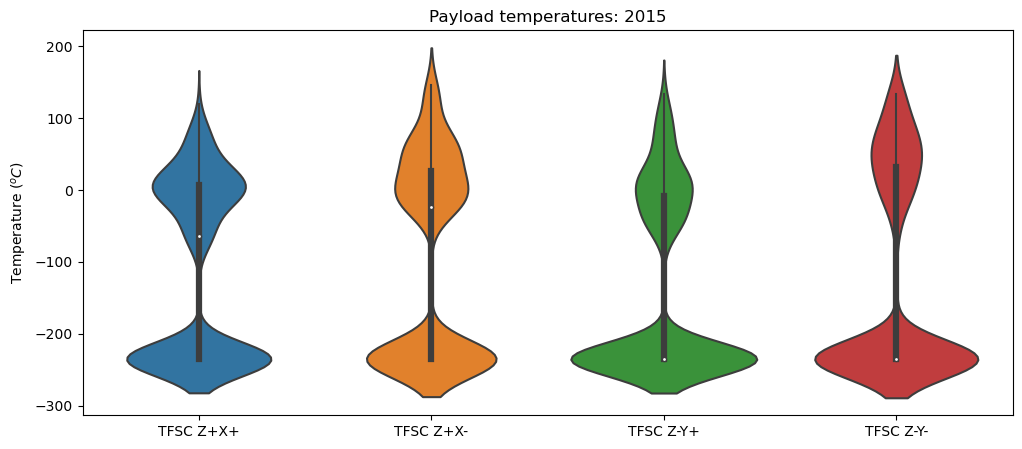

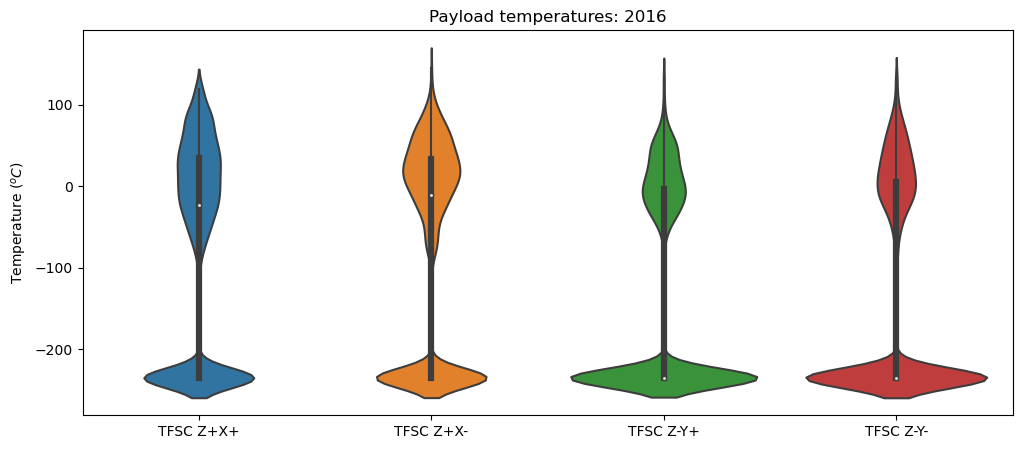

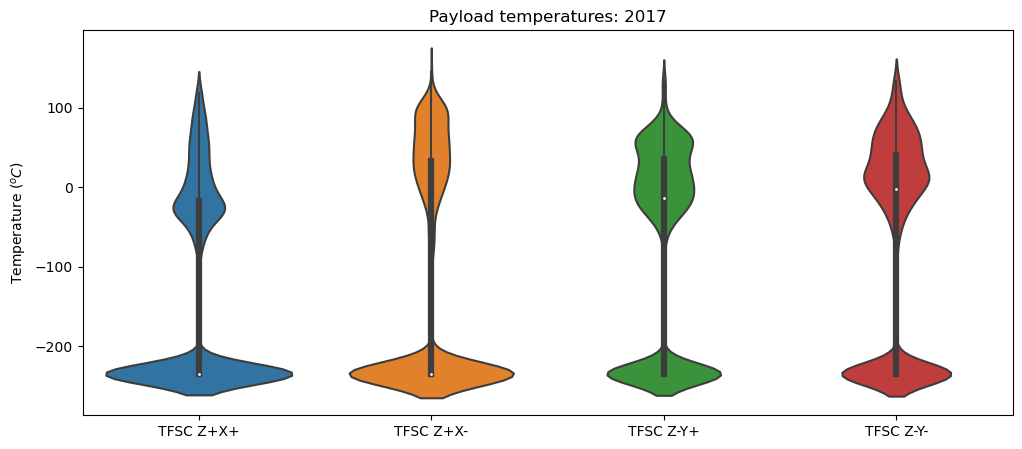

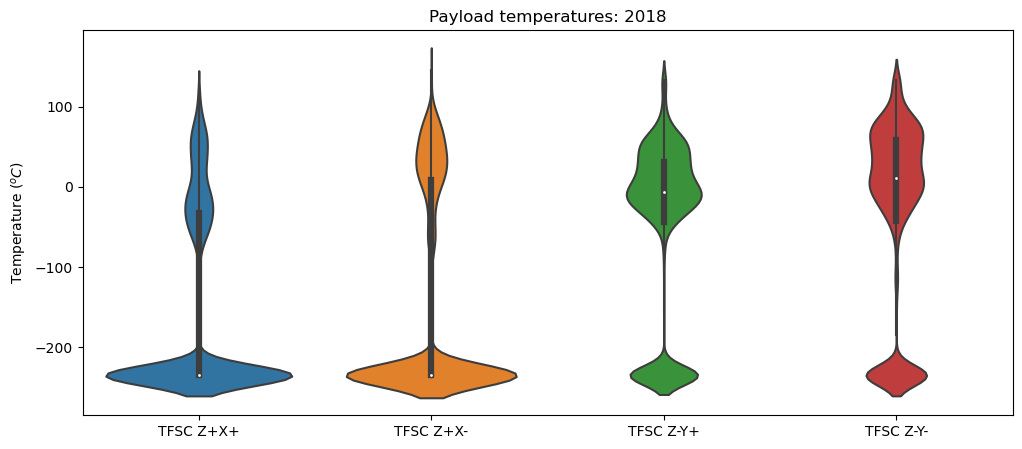

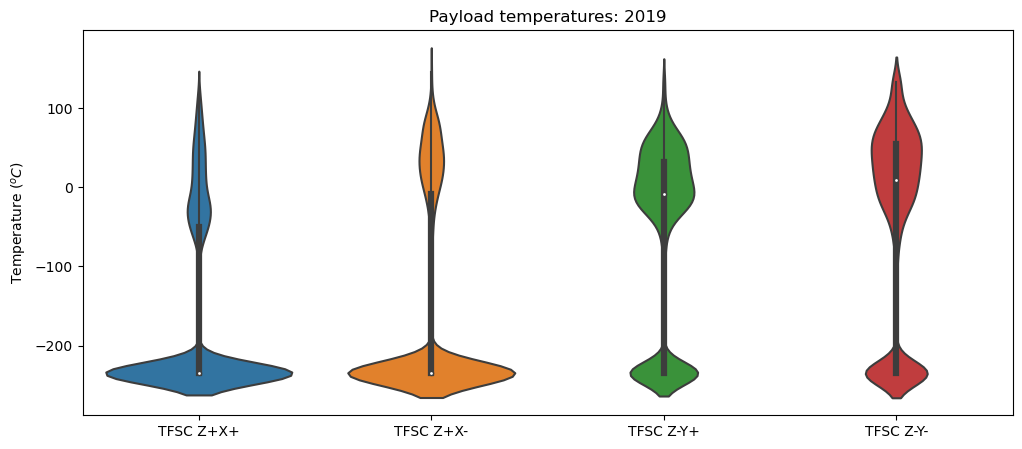

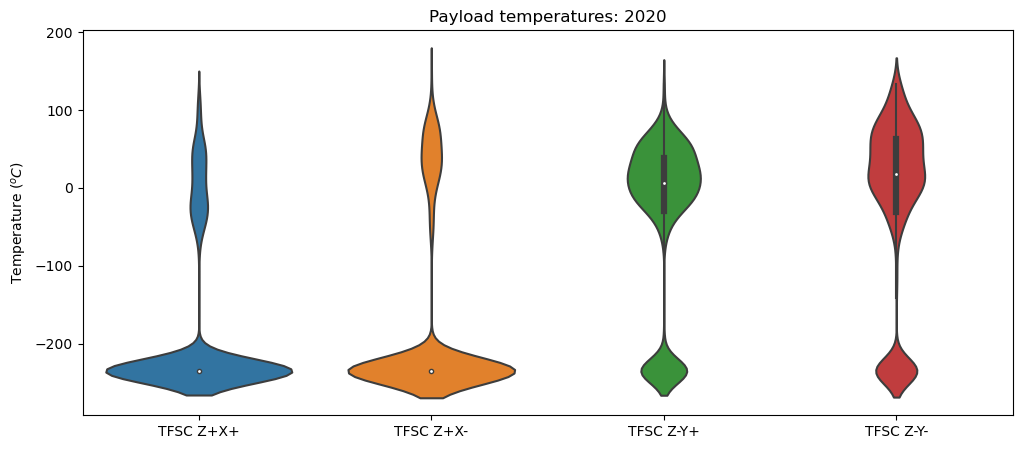

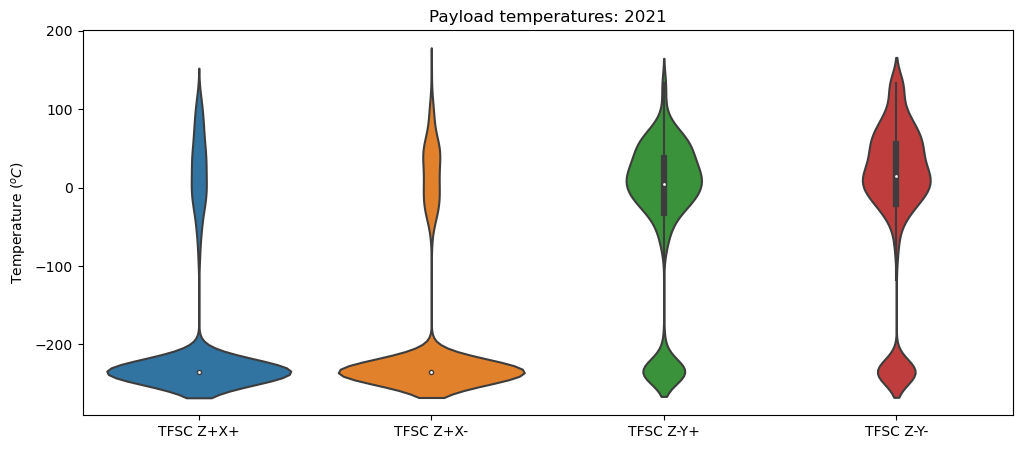

In [7]:
df_concat = pd.DataFrame()
for year in range(2008, 2022):
    fig, ax = plt.subplots(figsize=(12, 5))
    df = df_dict[f"{year}_payload_raw"]
    df_concat = pd.concat([df_concat, df])
    sns.violinplot(
        df.iloc[:, 1:5],
        ax=ax,
    )
    ax.set_xticklabels(["TFSC Z+X+", "TFSC Z+X-", "TFSC Z-Y+", "TFSC Z-Y-"])
    ax.set_ylabel(r"Temperature ($^o C$)")
    ax.set_title(f"Payload temperatures: {year}")
    
    fig.savefig(r"./plots/raw-temperatures/violin-plot-{}".format(year))
    plt.show()

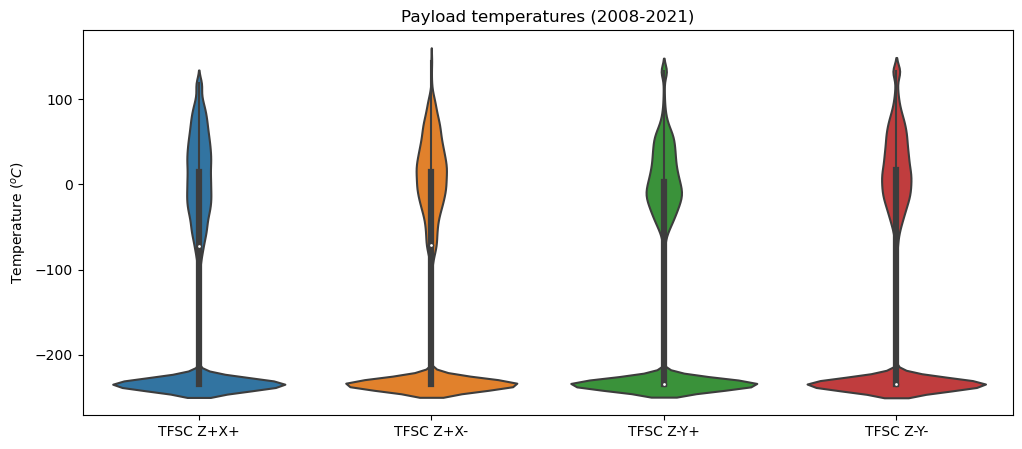

In [8]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.violinplot(
    df_concat.iloc[:, 1:5],
    ax=ax
)
ax.set_xticklabels(["TFSC Z+X+", "TFSC Z+X-", "TFSC Z-Y+", "TFSC Z-Y-"])
ax.set_ylabel(r"Temperature ($^o C$)")
ax.set_title("Payload temperatures (2008-2021)")
plt.show()
fig.savefig(r"./plots/raw-temperatures/violin-plot-2008-2021")

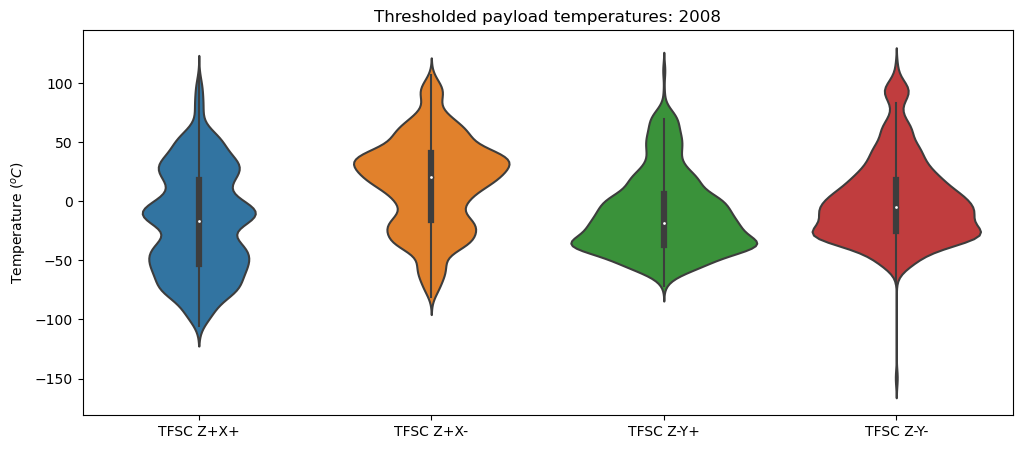

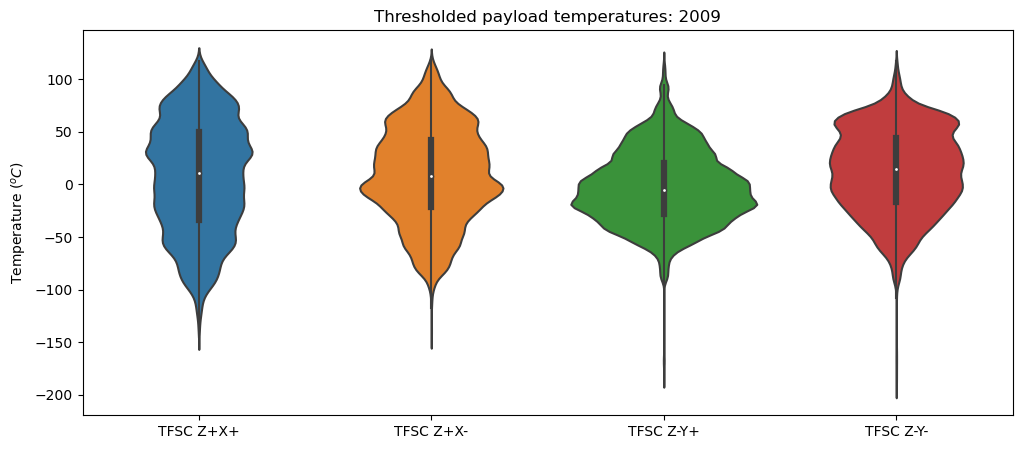

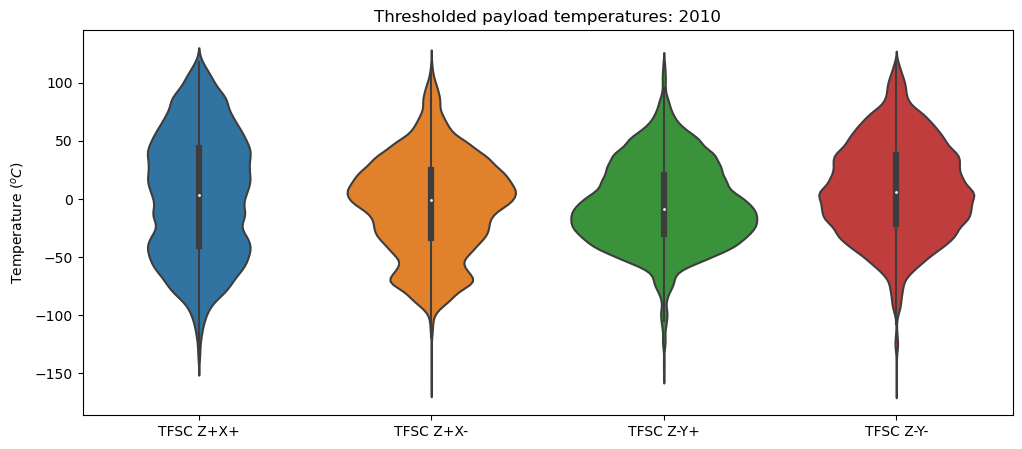

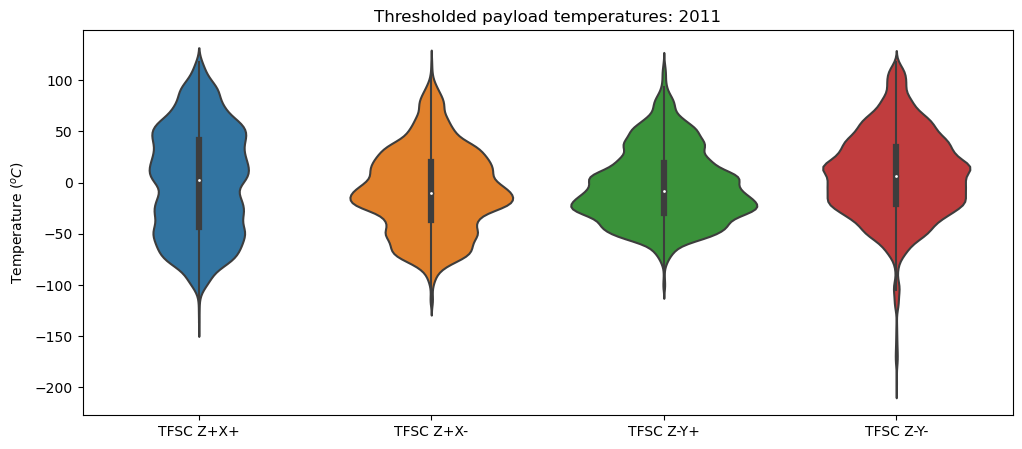

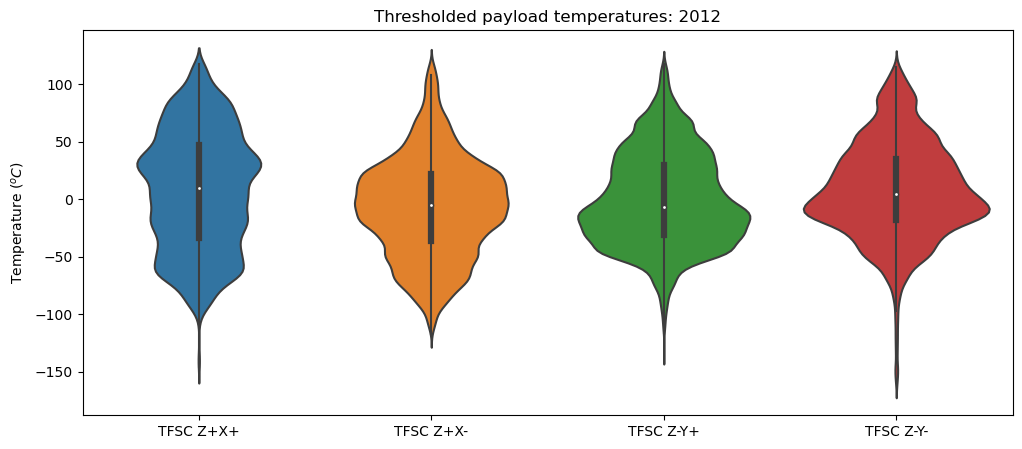

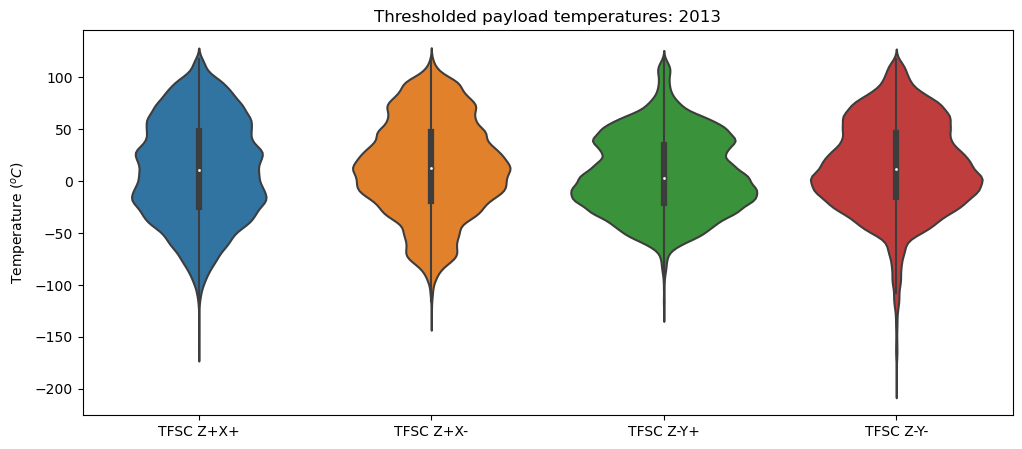

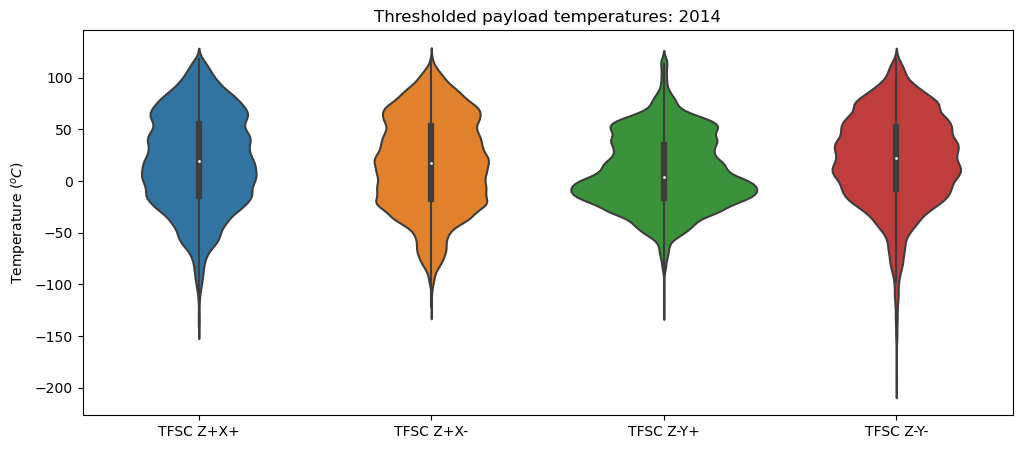

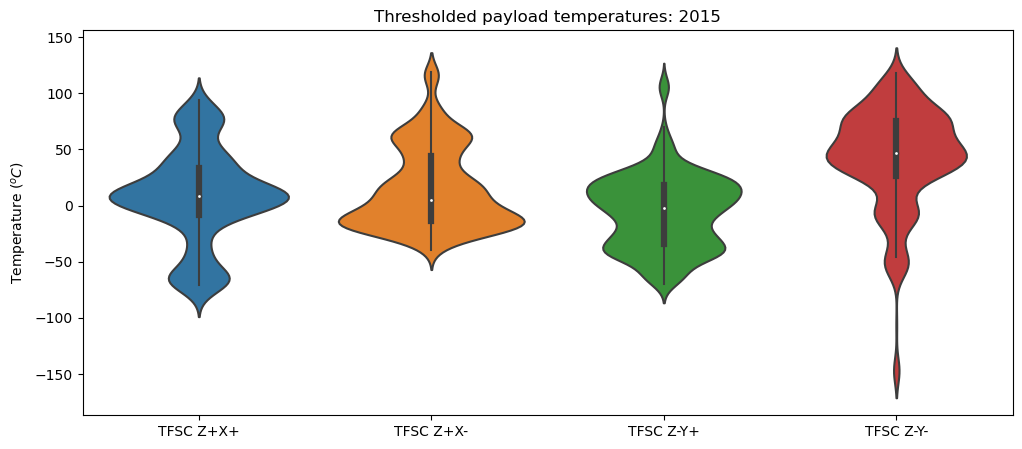

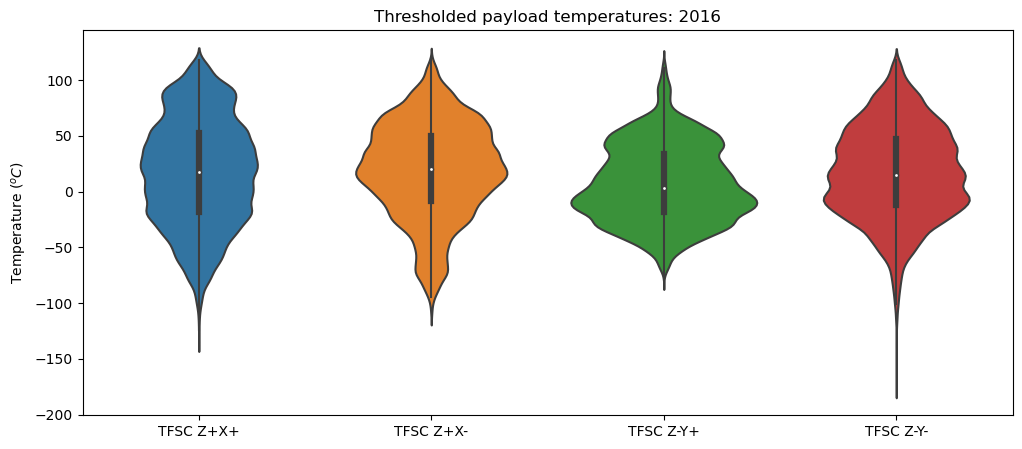

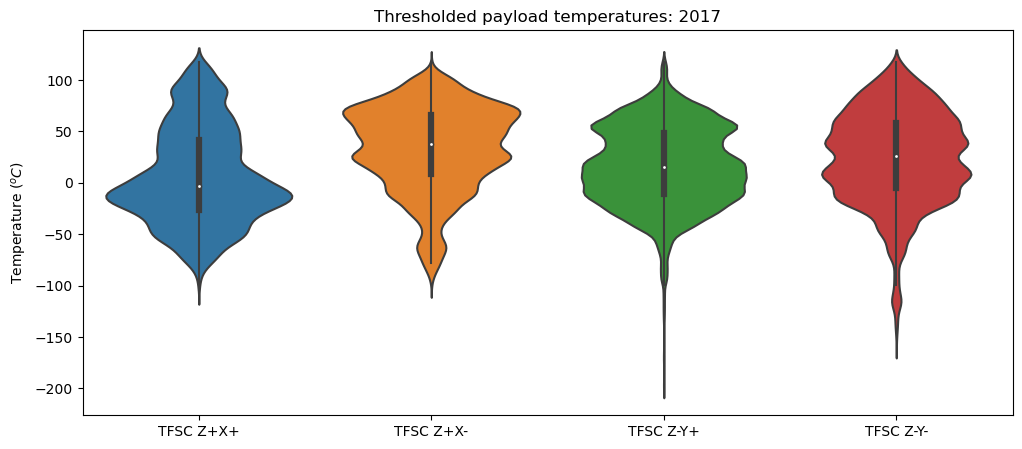

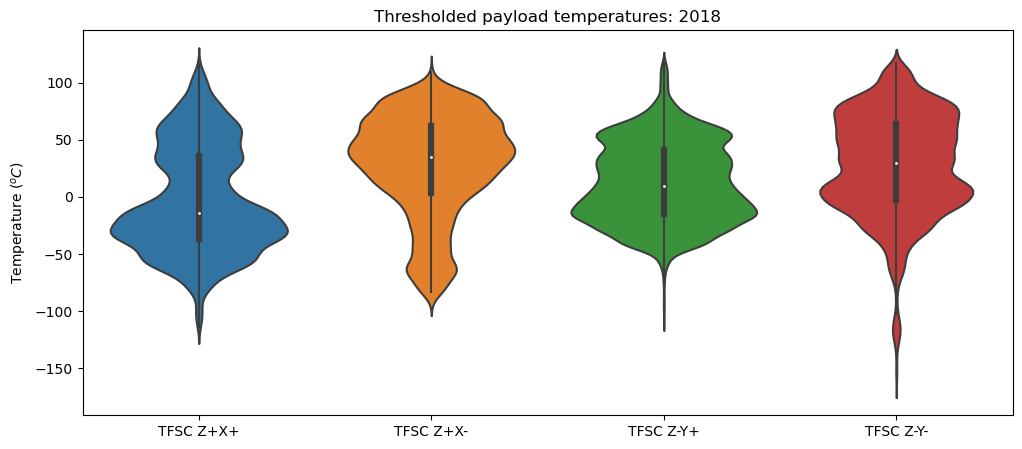

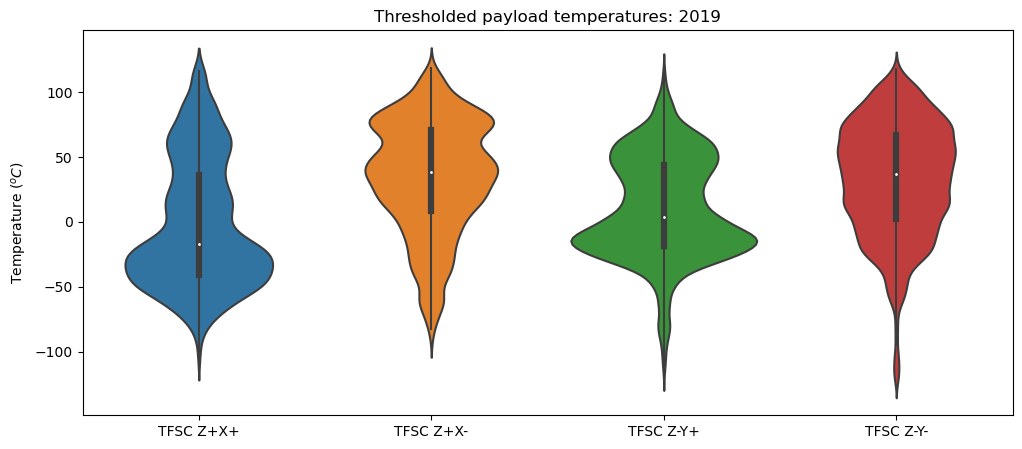

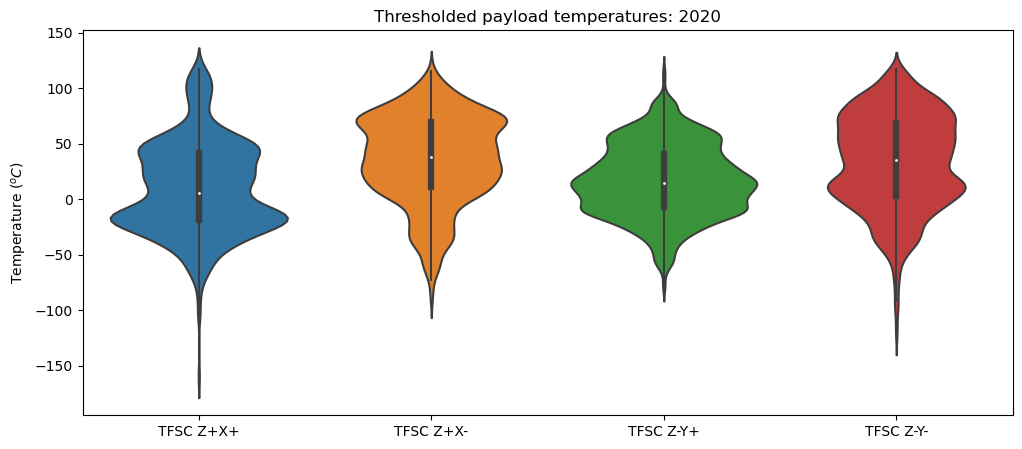

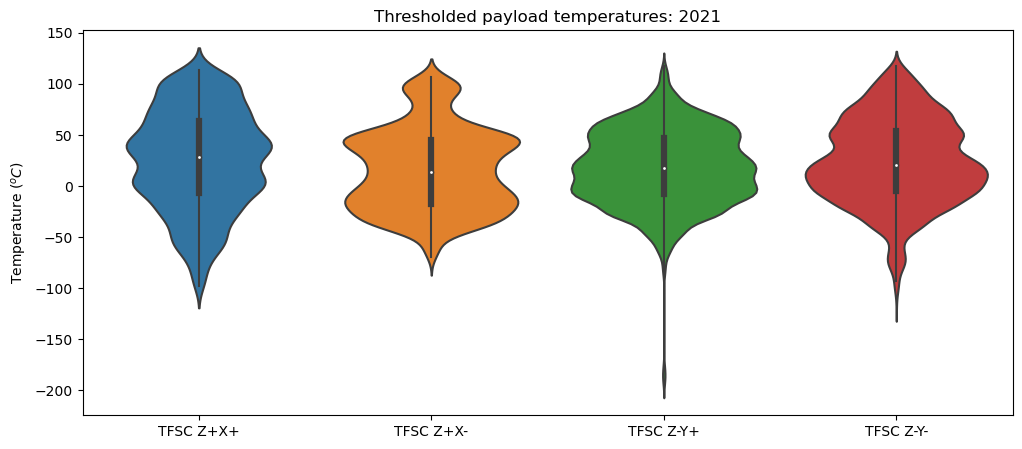

In [9]:
df_concat = pd.DataFrame()
for year in range(2008, 2022):
    fig, ax = plt.subplots(figsize=(12, 5))
    df = df_dict[f"{year}_payload"]
    df_concat = pd.concat([df_concat, df])
    sns.violinplot(
        df.iloc[:, 12:16] - 273.15,
        ax=ax,
    )
    ax.set_xticklabels(["TFSC Z+X+", "TFSC Z+X-", "TFSC Z-Y+", "TFSC Z-Y-"])
    ax.set_ylabel(r"Temperature ($^o C$)")
    ax.set_title(f"Thresholded payload temperatures: {year}")
    plt.show()
    
    fig.savefig(r"./plots/processed-temperatures/violin-plot={}".format(year))

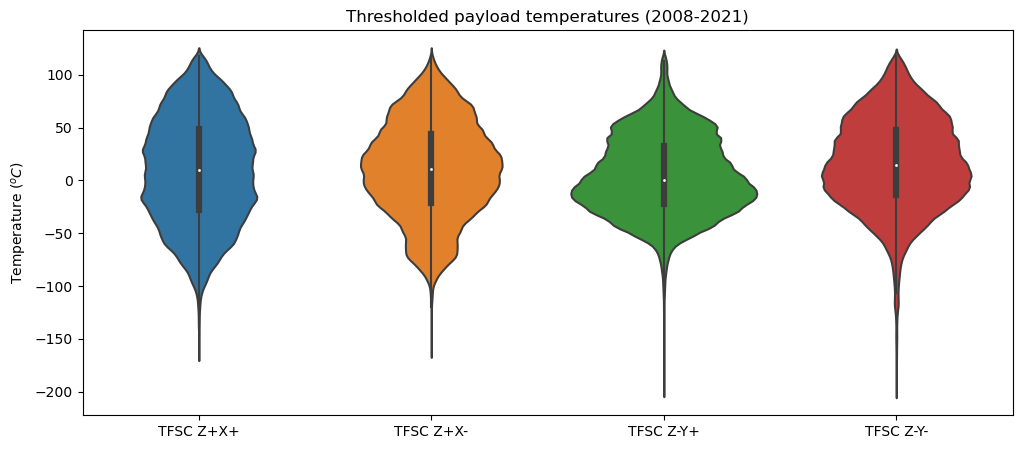

In [10]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.violinplot(
    df_concat.iloc[:, 12:16] - 273.15,
    ax=ax
)
ax.set_xticklabels(["TFSC Z+X+", "TFSC Z+X-", "TFSC Z-Y+", "TFSC Z-Y-"])
ax.set_ylabel(r"Temperature ($^o C$)")
ax.set_title("Thresholded payload temperatures (2008-2021)")
plt.show()

fig.savefig(r"./plots/processed-temperatures/violin-plot-2008-2021")

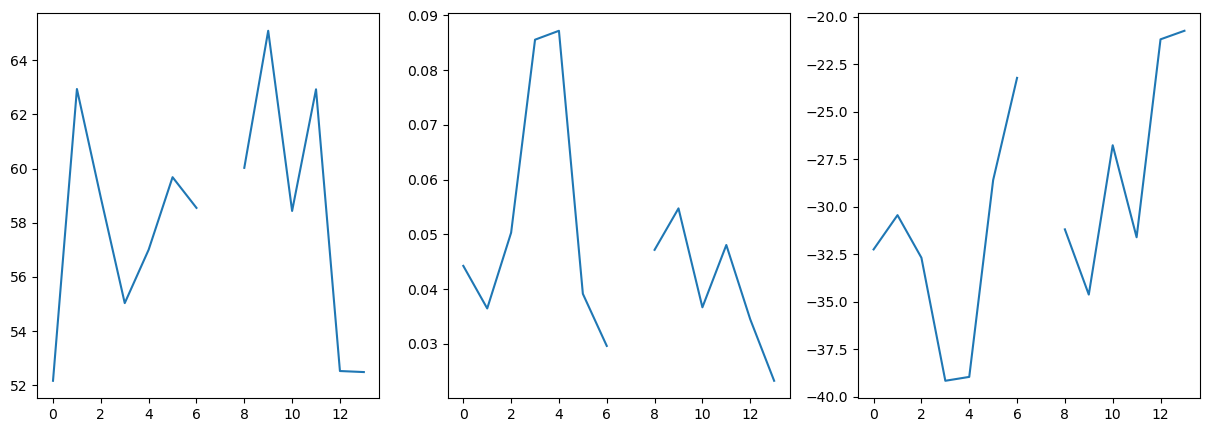

In [72]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(opt_list[:, 0])
ax[1].plot(opt_list[:, 1])
ax[2].plot(opt_list[:, 2])

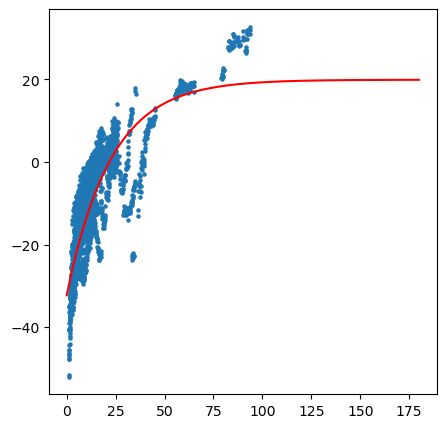

In [64]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(x_data, y_data, s=5)
plt.plot(x_fit, y_fit, color="red")